**Распознавание образов КТ1 - Выполнил Кирилл Запорожченко**

## Фильтры

**Фильтр Гаусса**

In [3]:
from scipy import ndimage
import matplotlib.pyplot as plt
import imageio
import PIL
import numpy as np
import cv2 
import skimage

In [10]:
mousepic = "mouse.bmp"

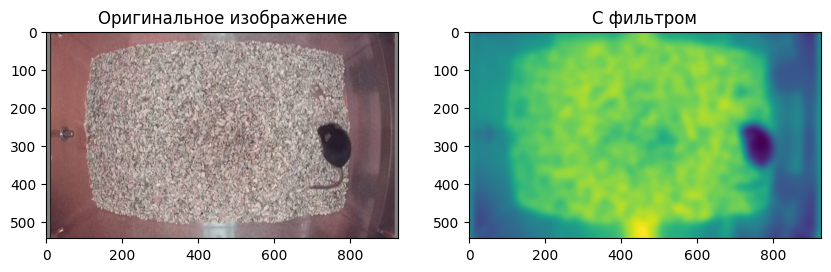

In [11]:
pic = PIL.Image.open(f"{mousepic}")
sigma = 10
pix = np.array(pic)
result = ndimage.gaussian_filter(pix, sigma)
PIL_image = PIL.Image.fromarray(np.uint8(result)).convert('L')
PIL_image.save("filtergauss.jpg")

# Отображаем изображения рядом
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(pic)
plt.title('Оригинальное изображение')

plt.subplot(1, 2, 2)
plt.imshow(PIL_image)
plt.title('С фильтром')

plt.show()

**Фильтр Робертса**

('R', 'G', 'B')
('L',)


Text(0.5, 1.0, 'Изображение с фильтром')

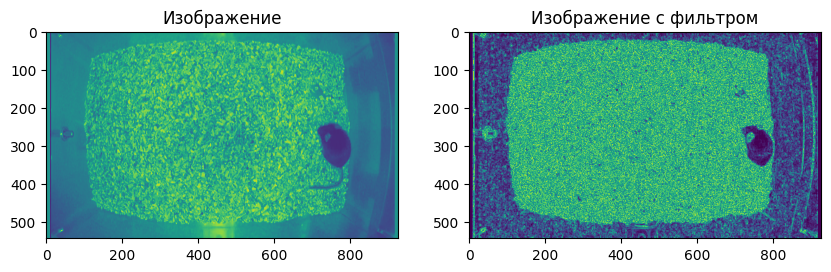

In [14]:
roberts_cross_v = np.array([[1, 0 ],
                            [0,-1 ]])
roberts_cross_h = np.array([[ 0, 1 ],
                            [ -1, 0 ]])

with PIL.Image.open(mousepic) as pix:
    pix.load()

b = pix.getbands()  # проверяем, сколько слоев в изображении
print(b)

# преобразуем в серое
pix = pix.convert("L")
 
b = pix.getbands()  # проверяем, сколько слоев в изображении
print(b)


vertical = ndimage.convolve(pix, roberts_cross_v)
horizontal = ndimage.convolve(pix, roberts_cross_h)
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))

PIL_image = PIL.Image.fromarray(np.uint8(edged_img))
PIL_image.save("roberts_test.jpg")

# Отображаем изображения рядом
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(pix)
plt.title('Изображение')

plt.subplot(1, 2, 2)
plt.imshow(PIL_image)
plt.title('Изображение с фильтром')

**Фильтр Прюитт**

Text(0.5, 1.0, 'Изображение с фильтром')

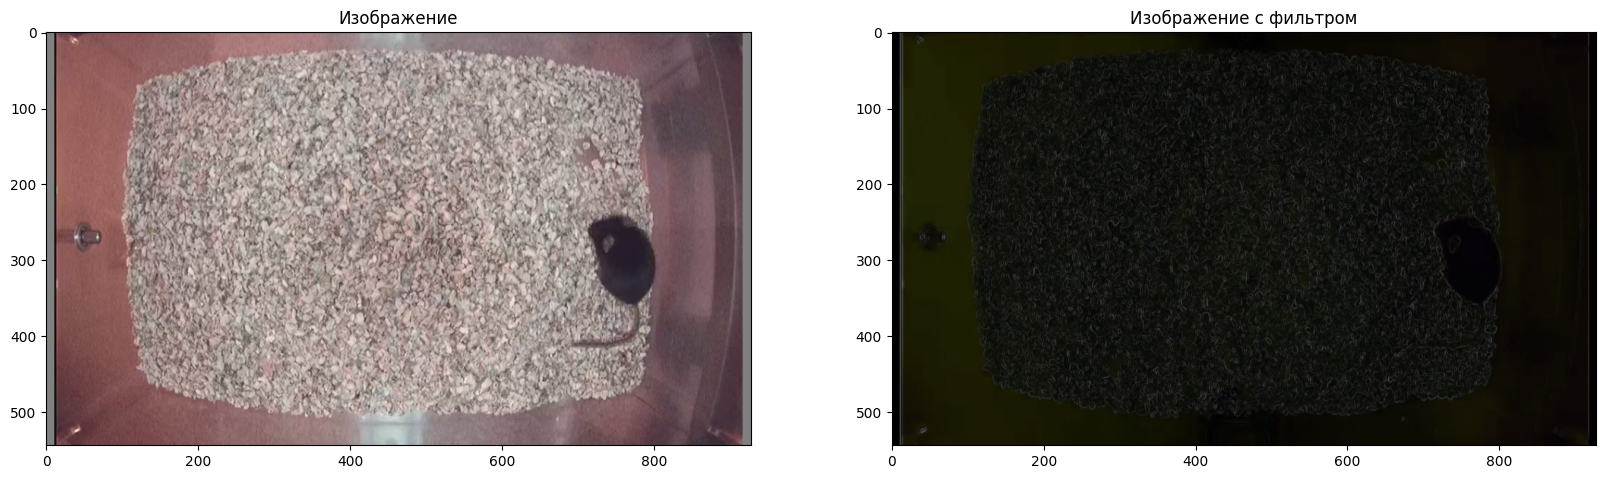

In [20]:
pic = PIL.Image.open(f"{mousepic}")
pix = np.array(pic)
input_shape = pix.shape
new_shape = input_shape[1], input_shape[0]
result = skimage.filters.prewitt(pix)

# Отображаем изображения рядом
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(pic)
plt.title('Изображение')

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title('Изображение с фильтром')

**Фильтр Лапласа**

Text(0.5, 1.0, 'Изображение с фильтром')

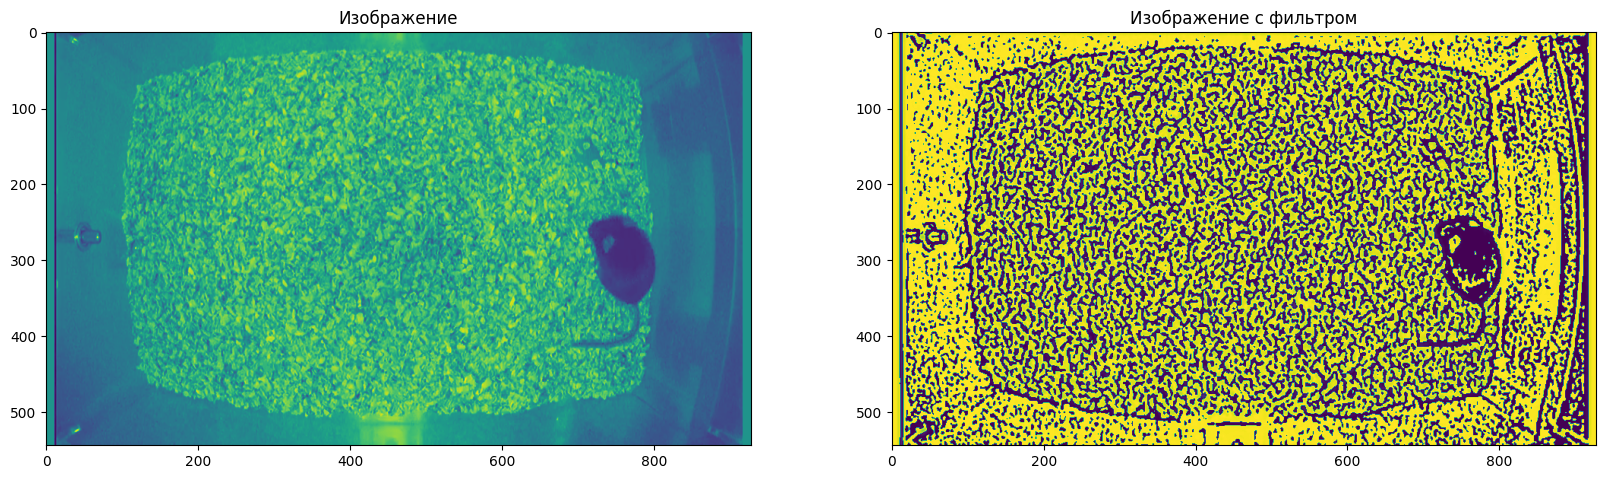

In [23]:
def LoG_filter(image, sigma, size=None):
    # ядро LoG
    if size is None:
        size = int(6 * sigma + 1) if sigma >= 1 else 7

    if size % 2 == 0:
        size += 1

    x, y = np.meshgrid(np.arange(-size//2+1, size//2+1), np.arange(- size // 2 + 1, size // 2 + 1))
    kernel = -(1/(np.pi * sigma**4)) * (1 - ((x**2 + y**2) / (2 * sigma**2))) * np.exp(- (x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / np.sum(np.abs(kernel))

    result = ndimage.convolve(image, kernel)
    return result

image = cv2.imread(f"{mousepic}", cv2.IMREAD_GRAYSCALE)
sigma = 2.0
filtered_image = LoG_filter(image, sigma)


# Отображаем изображения рядом
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Изображение')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image)
plt.title('Изображение с фильтром')

### MeanShift

In [29]:
from sklearn.cluster import MeanShift, estimate_bandwidth

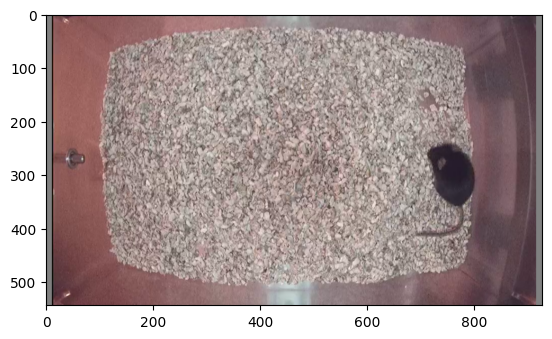

In [30]:
image = PIL.Image.open(f"{mousepic}").convert('RGB')

plt.imshow(image, cmap=plt.cm.gray, aspect='equal')


img = np.array(image)
shape = img.shape
new_shape = shape[1], shape[0]
reshaped_image = np.reshape(image, [-1, 3])
bandwidth = estimate_bandwidth(reshaped_image, quantile=0.1, n_samples=300)

msc = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msc.fit(reshaped_image)

labels = msc.labels_
result_image = np.reshape(labels, shape[:2])

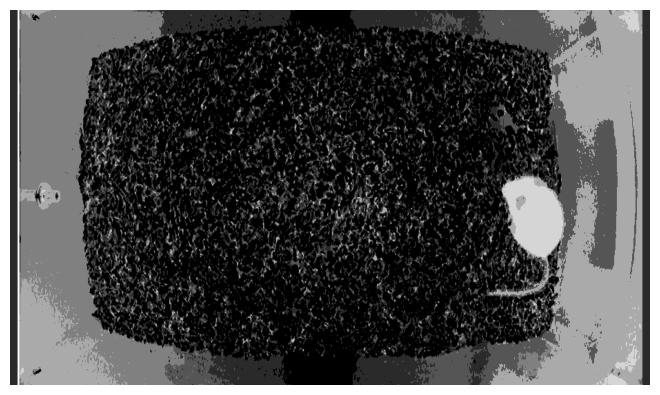

In [31]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

plt.imshow(result_image, cmap=plt.cm.gray, aspect='equal')
plt.savefig("meanshift_test.jpg", dpi=300)

### Floodfill & Floodfill + cv2.threshold

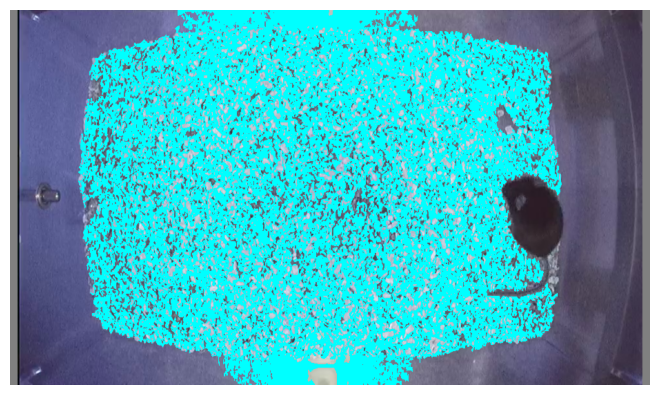

In [25]:
img = cv2.imread(f'{mousepic}')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

copyimg = img.copy()
h, w = copyimg.shape[:2]
mask = np.zeros([h + 2, w + 2], np.uint8)

# нужно задать координаты точек - центров заливки. Без этого работать не будет!

cv2.floodFill(copyimg, mask, (165,60), (0, 255, 255), (50, 20, 50), (50, 50 ,30), cv2.FLOODFILL_FIXED_RANGE)

fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(copyimg)
plt.savefig("floodfill_test.jpg", dpi=300)

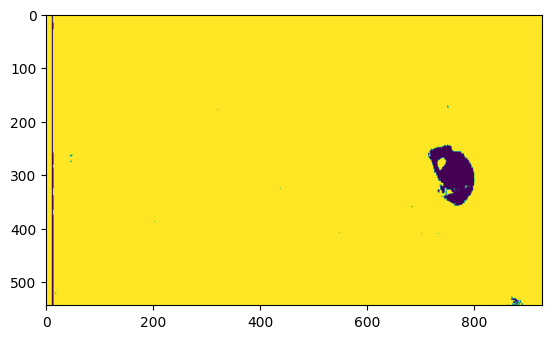

In [27]:
image = cv2.imread(f'{mousepic}')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

lower_bound = 50
upper_bound = 50

(thresh, BnW_image) = cv2.threshold(gray_image, lower_bound, upper_bound, cv2.THRESH_BINARY)
im = PIL.Image.fromarray(BnW_image)
im.save("threshold_test.jpg")
plt.imshow(im)

### Meanshift +  Floodfill & Meanshift + Floodfill + cv2.threshold (что то странное, ради интереса)

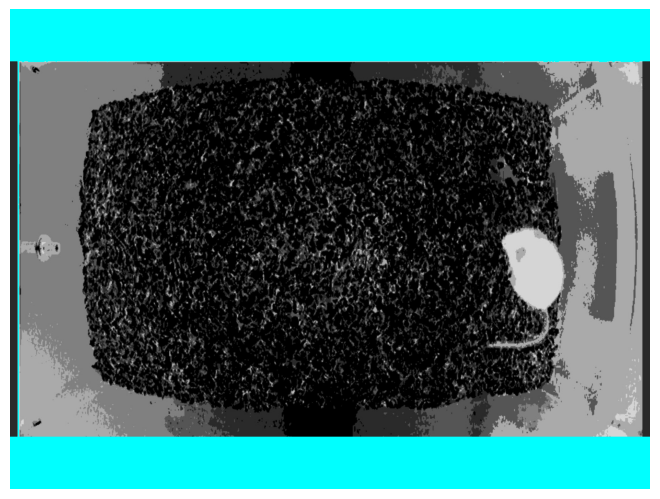

In [32]:
img = cv2.imread('meanshift_test.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

copyimg = img.copy()
h, w = copyimg.shape[:2]
mask = np.zeros([h + 2, w + 2], np.uint8)

# нужно задать координаты точек - центров заливки. Без этого работать не будет!

cv2.floodFill(copyimg, mask, (165,60), (0, 255, 255), (50, 20, 50), (50, 50 ,30), cv2.FLOODFILL_FIXED_RANGE)

fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(copyimg)
plt.savefig("meadshift_floodfill_test.jpg", dpi=300)

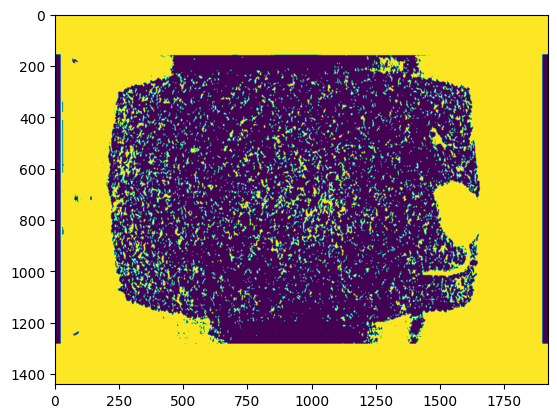

In [33]:
image = cv2.imread('meanshift_test.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

lower_bound = 50
upper_bound = 50

(thresh, BnW_image) = cv2.threshold(gray_image, lower_bound, upper_bound, cv2.THRESH_BINARY)
im = PIL.Image.fromarray(BnW_image)
im.save("meanshift_threshold_test.jpg")
plt.imshow(im)

### Шумы

Добавляем Гауссовский шум

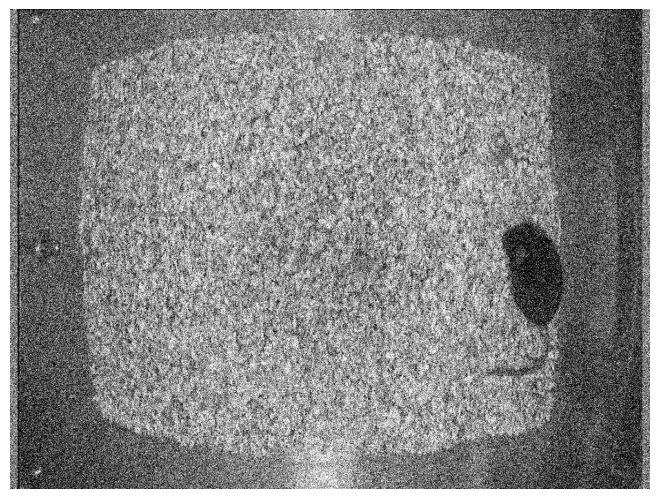

In [34]:
img = cv2.imread(f'{mousepic}')
img_gray = img[:,:,1]
noise = np.random.normal(0, 50, img_gray.shape) 
img_noised = img_gray + noise
img_noised = np.clip(img_noised, 0, 255).astype(np.uint8)

fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
plt.imshow(img_noised, cmap=plt.cm.gray, aspect='auto')
plt.savefig("gauss_noise_test.jpg", dpi=300)

Пробуем убрать шум

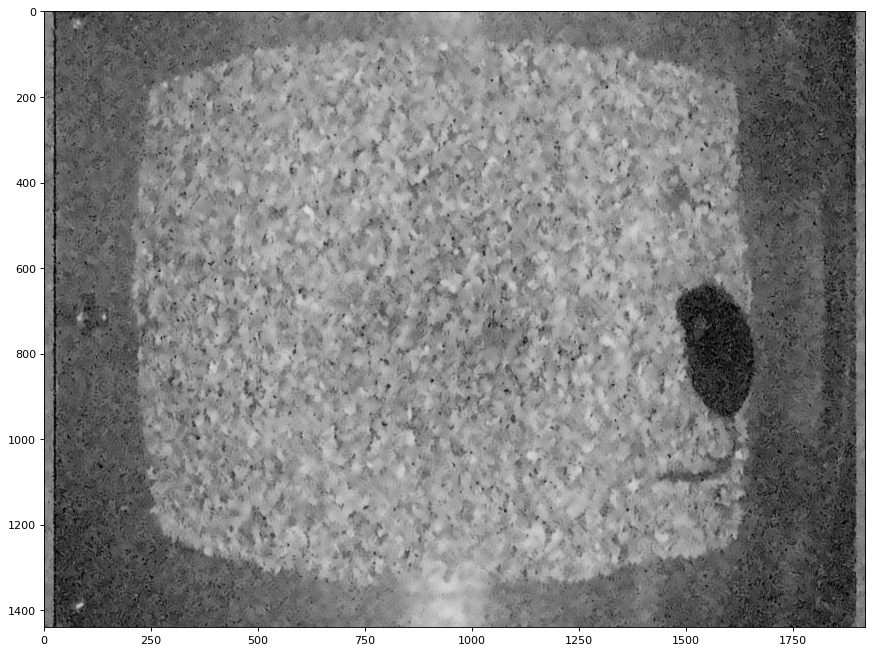

In [35]:
img = cv2.imread('gauss_noise_test.jpg')
dst = cv2.fastNlMeansDenoisingColored(img, None, 25)
plt.figure(figsize=(14, 10), dpi=80)
plt.imshow(dst)

## Классфикация